In [163]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as ny
from bindec import dec_to_bin, bin_to_dec
from PIL import Image
import imageio
import os

In [164]:
url=r"C:\Users\spectrumxking\Desktop\Project Final Sem\polly\elaine.tiff"
pic = cv.imread(url, cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'original')

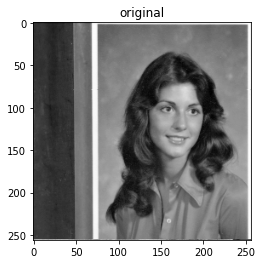

In [165]:
plt.imshow(pic,cmap="gray")
plt.title("original")


In [166]:
#readinf the image height and width
print(pic.shape)

(256, 256)


In [167]:
# converting original image into its 8bit binary form using binary_reper() 
lst=[]
for i in range (pic.shape[0]):
    for j in range (pic.shape[1]):
        lst.append(ny.binary_repr(pic[i][j], width=8))

In [168]:
# making the 8 bitplanes
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])

In [169]:
titles = ['original', 'bitplane8', 'bitplane7', 'bitplane6', 'bitplane5', 'bitplane4', 'bitplane3', 'bitplane2', 'bitplane1']
images = [pic, bitplane8, bitplane7, bitplane6, bitplane5, bitplane4, bitplane3, bitplane2, bitplane1]

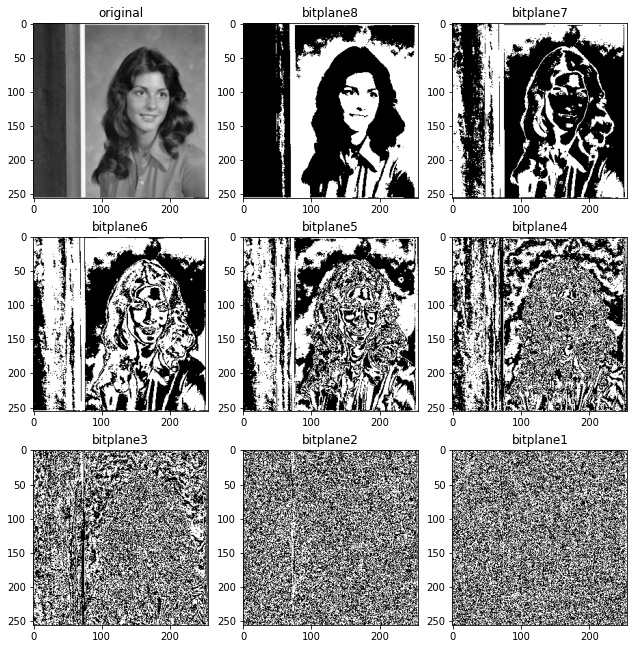

In [170]:
#showing the bitplanes into 3planes in a row.....
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

In [171]:
#each bitplanes in its binary form (saving by using index list)
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane8.shape
print(lst[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane7.shape
print (lst[2])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
print (lst[3])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
print (lst[4])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
print (lst[5])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
print (lst[6])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
print (lst[7])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])
print (lst[8])

00111000
00110111
00110111
00110110
00110110
00110011
00110100
00110111


In [172]:
#concatinate these image
conci = cv.hconcat([bitplane8, bitplane7])
convi = cv.hconcat([bitplane4, bitplane3])
final = cv.vconcat([conci,convi])


In [173]:
print(ny.array(pic).shape)

(256, 256)


In [174]:
newpic=bitplane8+bitplane7+bitplane6+bitplane5+bitplane4

In [175]:
print(ny.array(newpic).shape)

(256, 256)


In [176]:
print(newpic)

[[ 40  56  48 ... 248 240 232]
 [ 40  56  56 ... 248 240 232]
 [ 40  56  56 ... 248 240 232]
 ...
 [ 72  72  64 ... 240 240 240]
 [ 72  64  72 ... 240 240 240]
 [160 160 168 ...  80  80  72]]


In [177]:
print(bitplane8)

[[  0   0   0 ... 128 128 128]
 [  0   0   0 ... 128 128 128]
 [  0   0   0 ... 128 128 128]
 ...
 [  0   0   0 ... 128 128 128]
 [  0   0   0 ... 128 128 128]
 [128 128 128 ...   0   0   0]]


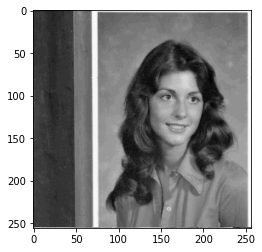

In [178]:
plt.imshow(newpic,cmap='gray')


In [179]:
def xor_matrix(matrix1, matrix2):
    return ny.bitwise_xor(matrix1, matrix2)

In [226]:
x =0.78
y =0.97
u =3.97
cipher_images = []
for i in range(4):
    x, y, random_matrix = get_random_matrix(u, x, y, 256,256)
    cipher_image = xor_matrix(random_matrix,keypic)
    cipher_images.append(cipher_image)


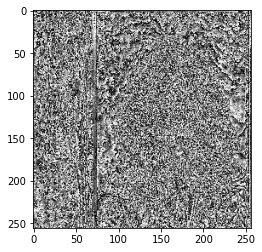

In [227]:
plt.imshow(cipher_image,cmap='gray')

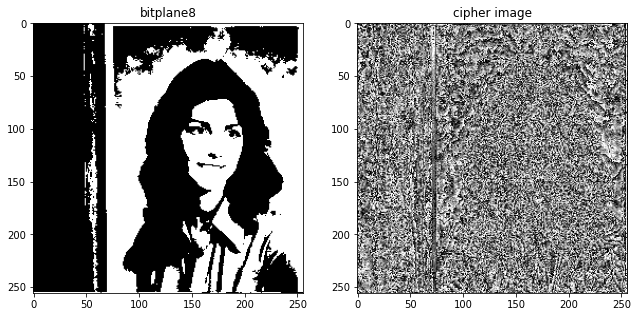

In [228]:
plt.subplot(1,2,1)
plt.title('bitplane8')
plt.imshow(images[1], cmap='gray')
plt.subplot(1,2,2)
plt.title('cipher image')
plt.imshow(cipher_images[0], cmap='gray')
plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

In [210]:
#defining arnolds cats maps
def arnold_cat_map(u, a):
    return u*a*(1-a)


In [211]:
#the fucking random matrix
def get_random_matrix(u, a, b, row, column):
    mat = []
    x = a
    y = b
    for i in range(row):
        temp = []
        for j in range(column):
            if x>y:
                temp.append(1)
            else:
                temp.append(0)
            x = arnold_cat_map(u, x)
            y = arnold_cat_map(u, y)
        mat.append(temp)
    return x,y,mat

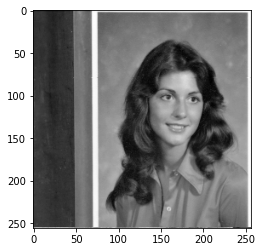

In [231]:
decrypt=ny.bitwise_xor(keypic,newpic)
plt.imshow(decrypt, cmap='gray')

[[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [1, 0, 0, 1]]
[[1, 0, 0, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 0, 0, 1]]
[[1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


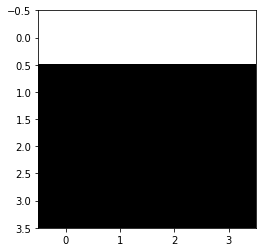

In [232]:
u = 3.57
x = 0.78
y = 0.98

if __name__ == '__main__':
    x,y,mat1 = get_random_matrix(u,x,y,4,4)
    x,y,mat2 = get_random_matrix(u,x,y,4,4)
    print(mat1)
    print(mat2)
    print(xor_matrix(mat1, mat2))
    lola=(xor_matrix(mat1,mat2))
    plt.imshow(lola, cmap='gray')

In [222]:
print(lola.shape)

(4, 4)


[[0 0 6 ... 0 6 0]
 [2 0 0 ... 0 6 2]
 [6 6 4 ... 0 6 0]
 ...
 [2 0 6 ... 6 6 2]
 [2 6 0 ... 6 6 4]
 [2 4 2 ... 4 2 4]]
(256, 256)


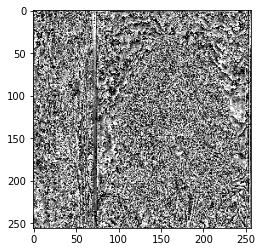

In [223]:
keypic=ny.bitwise_xor(bitplane3,bitplane2,bitplane1)
plt.imshow(keypic, cmap='gray')
print(keypic)
print(keypic.shape)

In [233]:
print(decrypt)
print(decrypt.shape)

[[ 40  56  54 ... 248 246 232]
 [ 42  56  56 ... 248 246 234]
 [ 46  62  60 ... 248 246 232]
 ...
 [ 74  72  70 ... 246 246 242]
 [ 74  70  72 ... 246 246 244]
 [162 164 170 ...  84  82  76]]
(256, 256)


In [234]:
print (pic)
print(pic.shape)

[[ 41  56  55 ... 249 247 232]
 [ 42  56  57 ... 249 247 235]
 [ 47  63  61 ... 249 247 233]
 ...
 [ 74  73  71 ... 246 247 243]
 [ 75  71  72 ... 247 247 244]
 [162 165 170 ...  84  83  77]]
(256, 256)
